In [2]:
import pandas as pd
import glob

path = r'/home/hakanergin/code/apriltag_test_bench/test_pipeline/scripts/static_tests/translations/result/csv' # use your path
all_files = glob.glob(path + "/*.csv")

df_groupby_res = {"360": {}, "720": {}, "1080": {}}

for filename in all_files:
    tag, res  = filename.split('_')[-2:]
    res = res.split('.')[0]
    tag = tag.split('/')[-1]

    df = pd.read_csv(filename)
    df = df[['error', 'true_distance']]
    # display(res, tag)

    df_groupby_res[res].update({tag: df})


In [3]:
for key in df_groupby_res.keys():
    print(key)
    print(df_groupby_res[key].keys())


360
dict_keys(['36h11', '25h9', '21h7', '16h5'])
720
dict_keys(['25h9', '36h11', '16h5', '21h7'])
1080
dict_keys(['36h11', '25h9', '21h7', '16h5'])


In [4]:
df_360 = pd.concat(df_groupby_res['360']).reset_index().rename({'level_0': 'tag'}, axis=1).drop(columns=['level_1'], axis=1)
df_720 = pd.concat(df_groupby_res['720']).reset_index().rename({'level_0': 'tag'}, axis=1).drop(columns=['level_1'], axis=1)
df_1080 = pd.concat(df_groupby_res['1080']).reset_index().rename({'level_0': 'tag'}, axis=1).drop(columns=['level_1'], axis=1)

In [5]:
df_720

,tag,error,true_distance
0,25h9,0.002856,2
1,25h9,-0.005255,2
2,25h9,0.006809,2
3,25h9,0.007339,2
4,25h9,0.007338,2
...,...,...,...
771,21h7,-0.138582,8
772,21h7,-0.136461,8
773,21h7,-0.137478,8
774,21h7,-0.134755,8


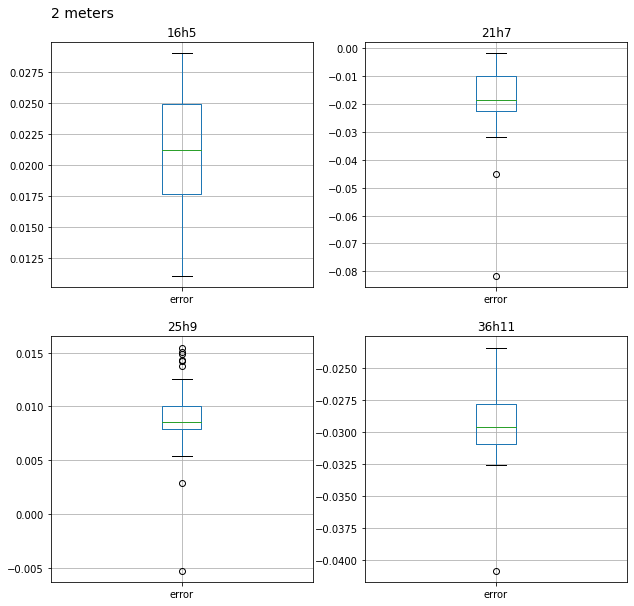

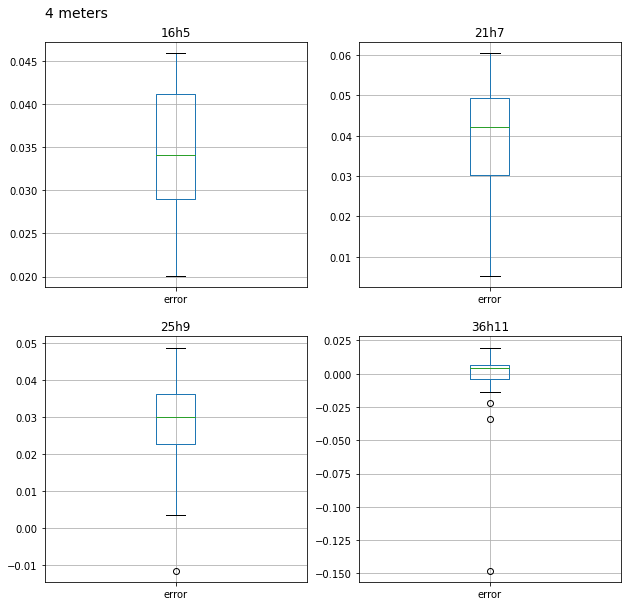

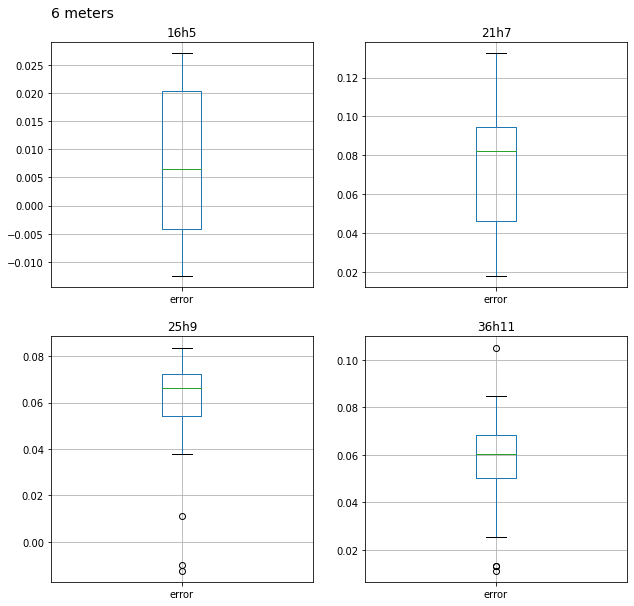

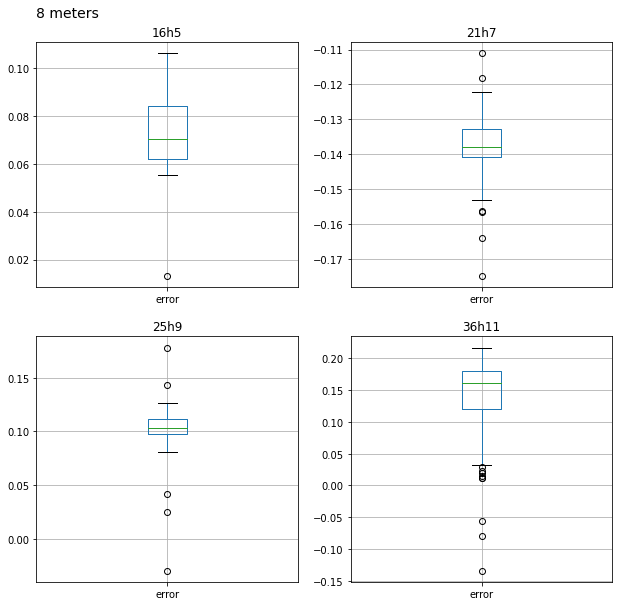

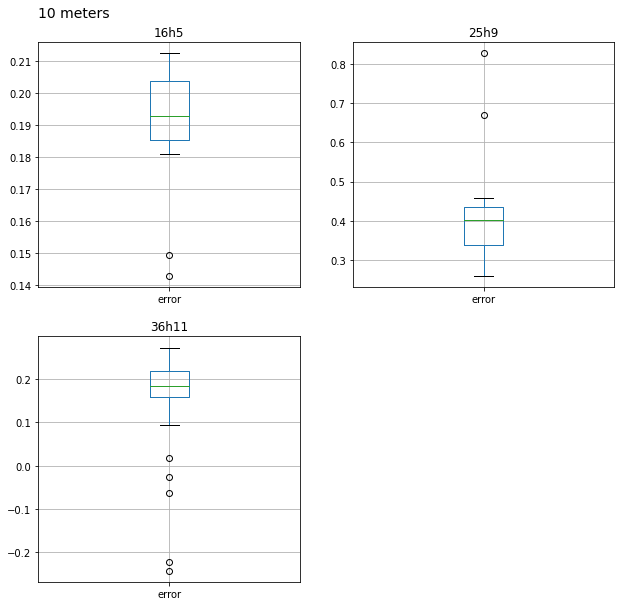

In [52]:
for distance in df_720['true_distance'].unique():
    ax = df_720.loc[df_720['true_distance']==distance].groupby('tag').boxplot(column=['error'], figsize=(10,10), sharey=False)
    dist_text = '{} meters'.format(distance)
    ax[0].text(0, 1.1, s=dist_text, fontsize=14,  transform = ax[0].transAxes)
